# A Practical Guide to exploring Missing Values in Python

When exploring a dataset, one of the first steps is to explore any missing values, understand how widespread they are, and see how these missing values might relate across different variables. This is crucial for understanding the completeness of your data and making informed decisions on how to handle missing values. 

Handling missing data is crucial for accurate and reliable models. In the code below, I’ll share practical techniques for exploring missing values with Python.

In this example, I’ll use a Kaggle dataset that challenges participants to build a model detecting early signs of excessive internet use from physical and fitness data. The dataset has 82 variables, with 81 used to predict the target variable, the Severity Impairment Index (sii)—a common measure of problematic internet use. If you're interested in more details about the competition and dataset, you can find them on Kaggle here.

Let's load the dataset and get a feel for it.

In [2]:
#import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import PercentFormatter  # Import PercentFormatter

In [3]:
#load data
train = pd.read_csv('data/train.csv')
train.columns = train.columns.str.lower().str.replace(r'\W+', '_', regex=True)


In [4]:
train.head()

,id,basic_demos_enroll_season,basic_demos_age,basic_demos_sex,cgas_season,cgas_cgas_score,physical_season,physical_bmi,physical_height,physical_weight,...,pciat_pciat_18,pciat_pciat_19,pciat_pciat_20,pciat_pciat_total,sds_season,sds_sds_total_raw,sds_sds_total_t,preint_eduhx_season,preint_eduhx_computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Data columns (total 82 columns):
train.describe()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   basic_demos_enroll_season               3960 non-null   object 
 2   basic_demos_age                         3960 non-null   int64  
 3   basic_demos_sex                         3960 non-null   int64  
 4   cgas_season                             2555 non-null   object 
 5   cgas_cgas_score                         2421 non-null   float64
 6   physical_season                         3310 non-null   object 
 7   physical_bmi                            3022 non-null   float64
 8   physical_height                         3027 non-null   float64
 9   physical_weight                         3076 non-null   float64
 10  physical_waist_circumference            898 non-null    floa

### 1. Histograms

One effective way to visualize missing values in a dataset is by using a histogram. In this particular case, we are working with a complex dataset containing 82 variables.
By plotting a histogram of missing values for each variable, we can quickly identify which variables have high levels of missing data. This approach allows us to see the distribution of missing values across all variables, providing an initial understanding of data quality and highlighting any potential issues that may require further data cleaning or imputation.

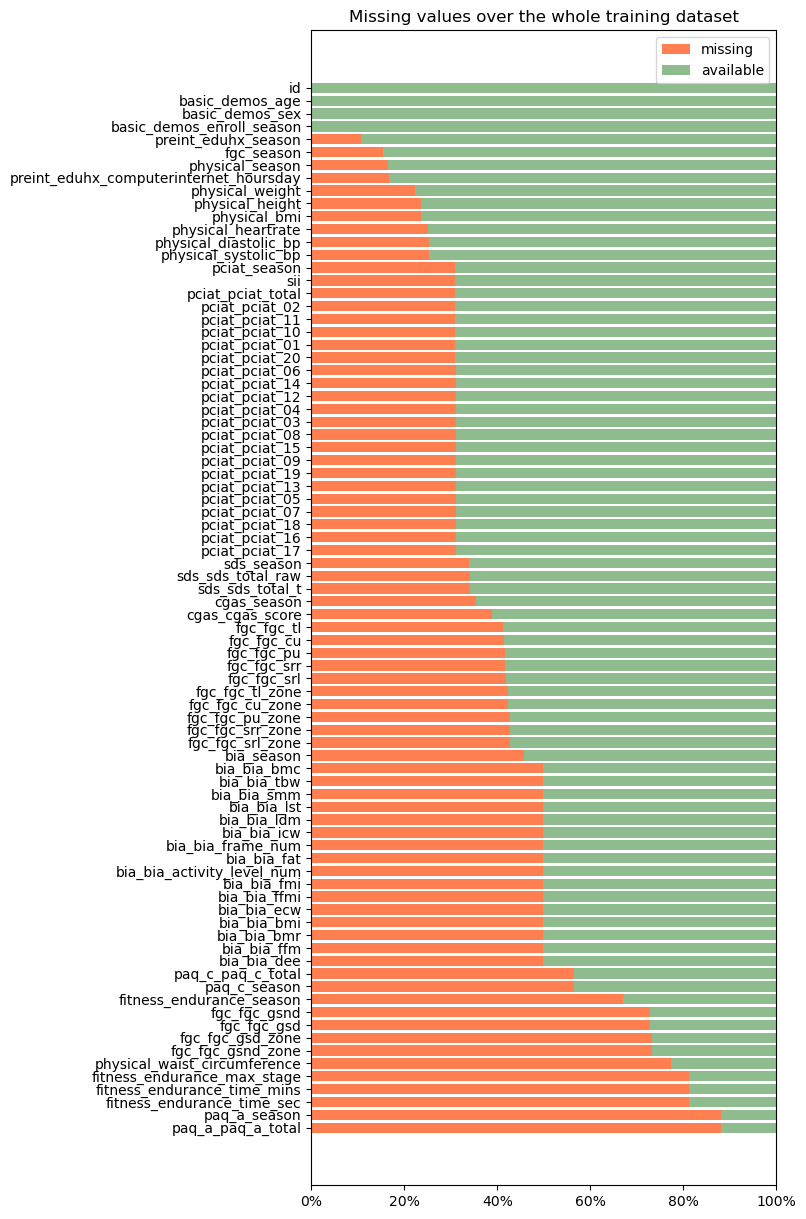

In [6]:
# Count missing values and calculate the null ratio for each column
missing_count = (
    pd.DataFrame({
        'feature': train.columns,  # Get column names
        'null_count': train.isnull().sum()  # Count missing values
    })
    .sort_values(by='null_count', ascending=False)  # Sort by the count of missing values
)

# Add the ratio of missing values
missing_count['null_ratio'] = missing_count['null_count'] / len(train)

# Plot missing values
plt.figure(figsize=(6, 15))
plt.title('Missing values over the whole training dataset')

# Plot bars for missing and available data
plt.barh(np.arange(len(missing_count)), missing_count['null_ratio'], color='coral', label='missing')
plt.barh(np.arange(len(missing_count)), 
         1 - missing_count['null_ratio'], 
         left=missing_count['null_ratio'], 
         color='darkseagreen', label='available')

# Set y-ticks to display feature names
plt.yticks(np.arange(len(missing_count)), missing_count['feature'])

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

# Set limits for x-axis
plt.xlim(0, 1)

# Show legend and plot
plt.legend()
plt.show();

## Detecting missing data visually using Missingno library
Missingno library offers a practical way to visualize the distribution of missing values with a couple of very useful functions. 

In [7]:
import missingno as msno
import matplotlib.pyplot as plt


### 2. Missingness Dendrogram: 
The missingness dendrogram describes the correlations in missingness by grouping similarly missing columns together.

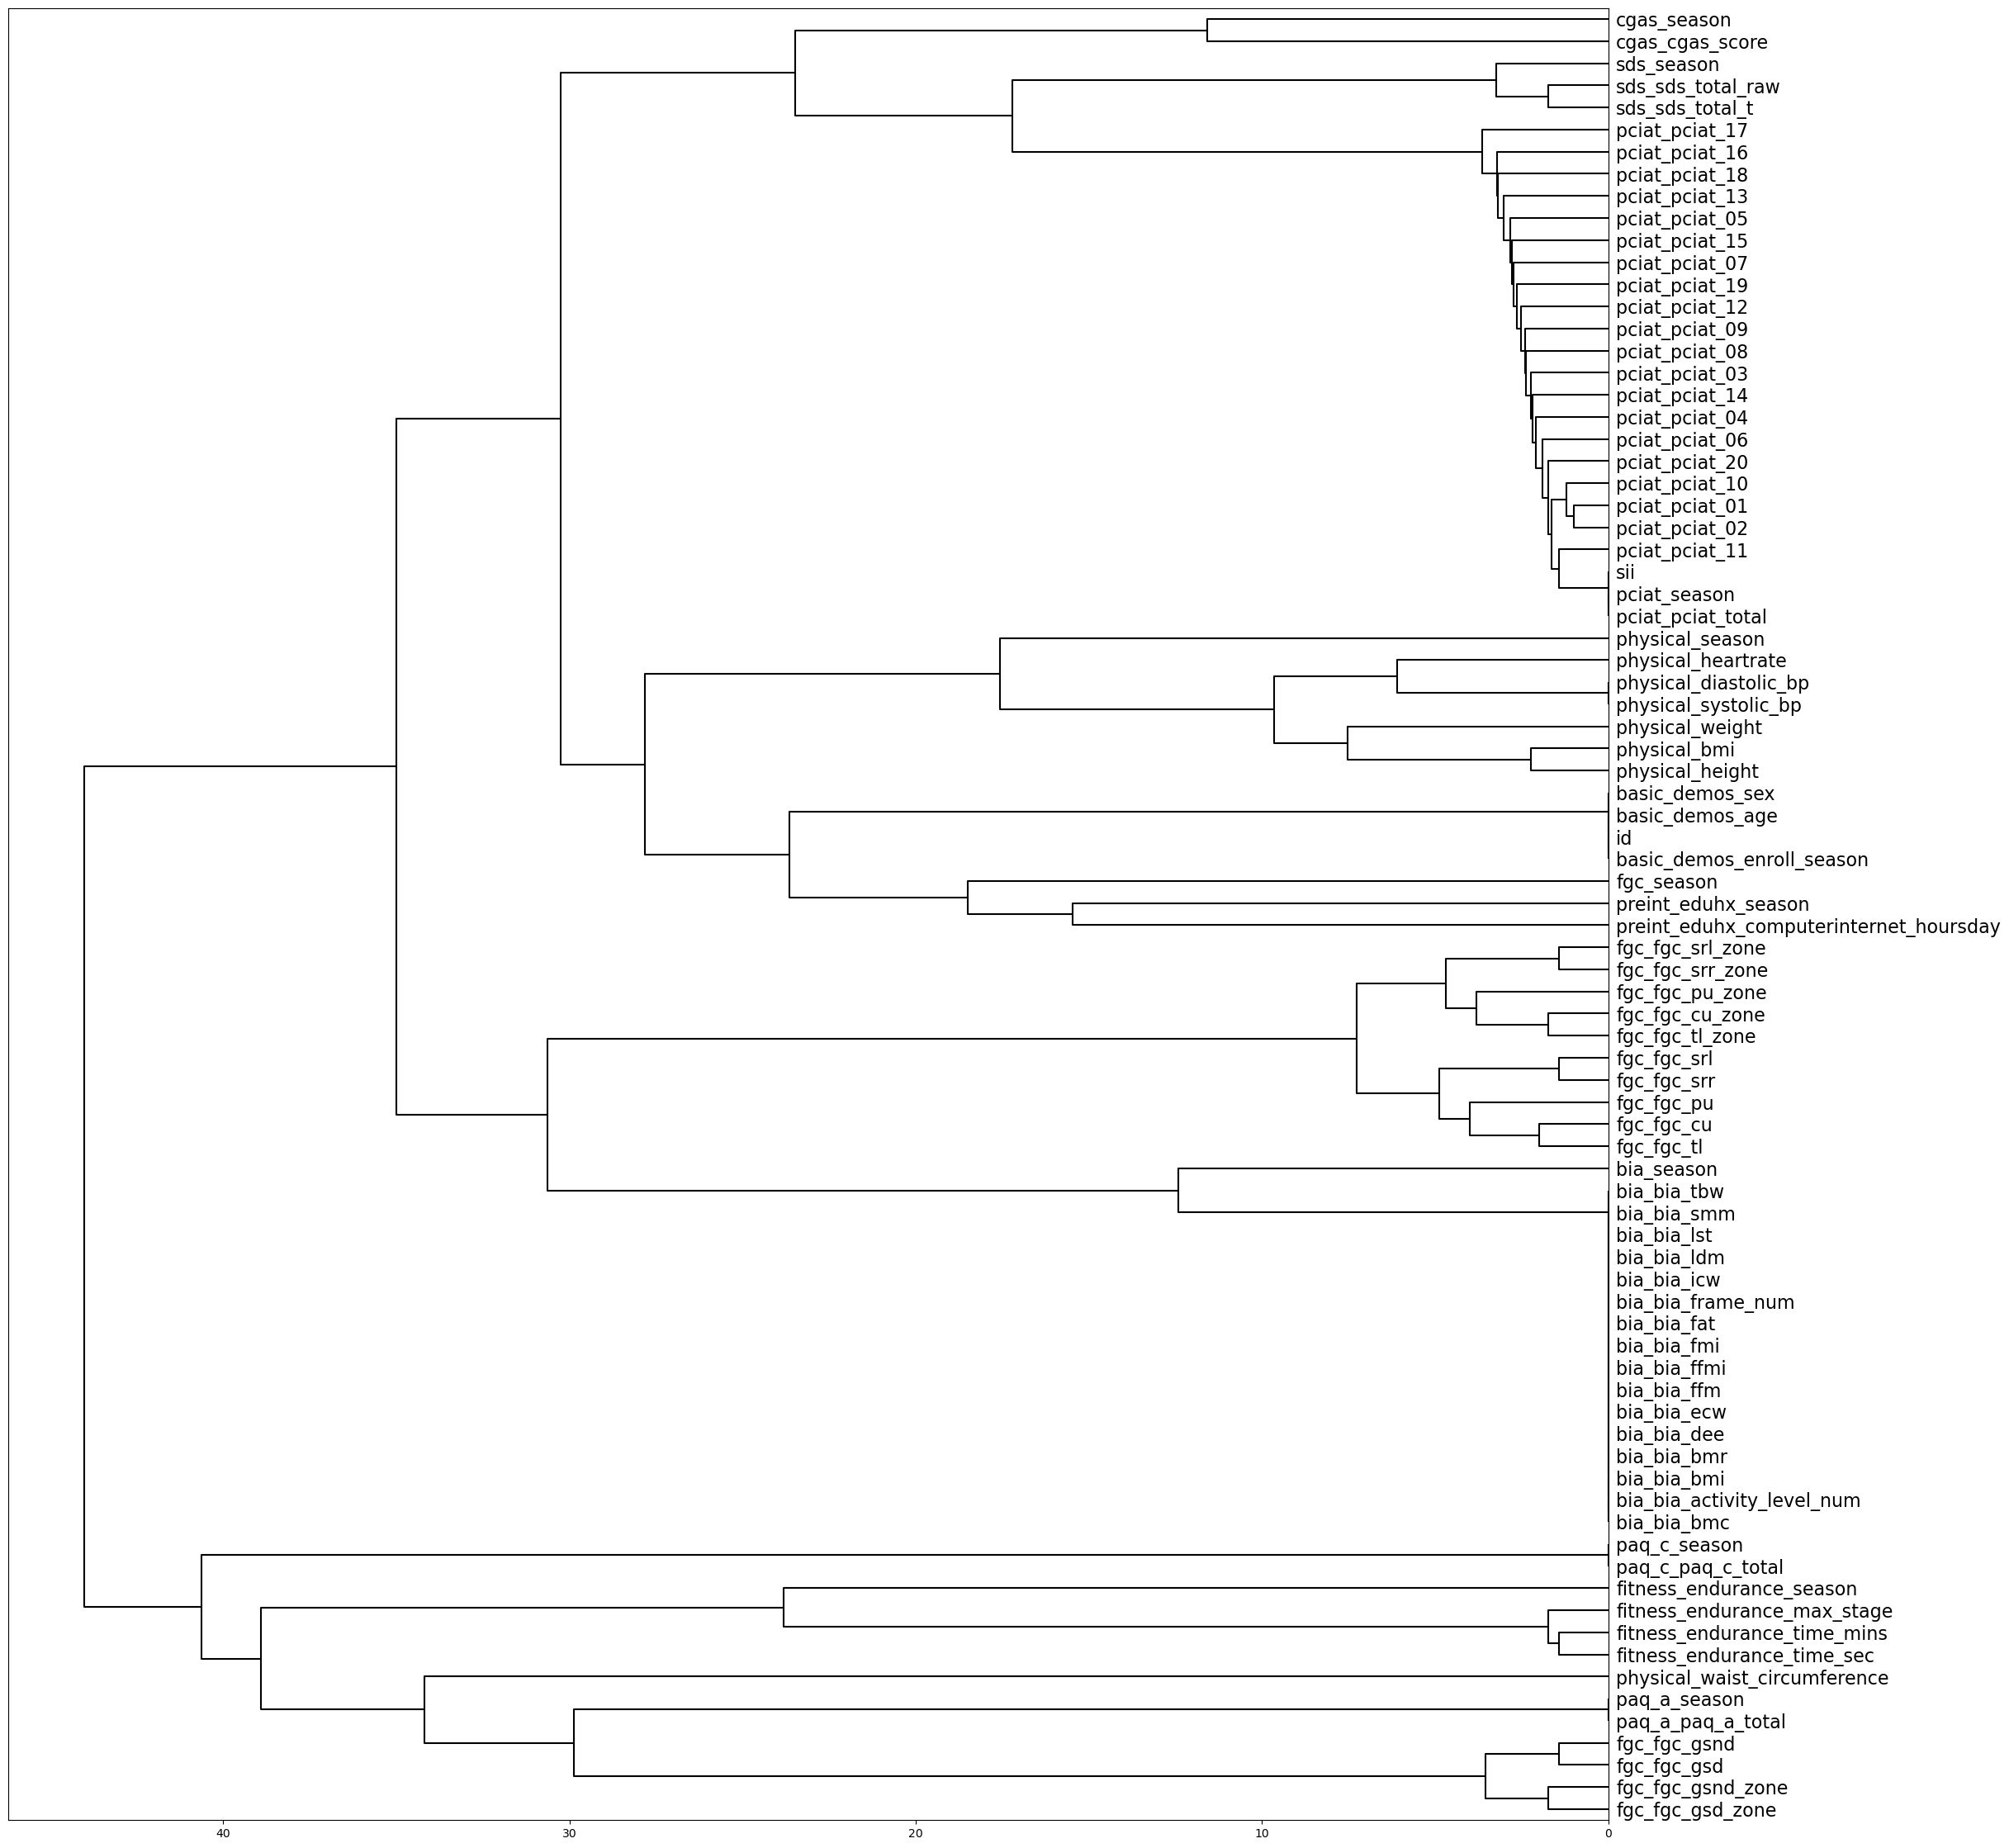

In [8]:
# Create the dendrogram
try:
    # Create the dendrogram
    msno.dendrogram(train)
except ValueError:
    # Ignore the ValueError
    pass

### 3. Missingness Heatmap: 
The missingness heatmap seen here describes the correlation of missingness between columns. In simple terms, the columns where the missing values co-occur the maximum are highly related and vice-versa.

<Axes: >

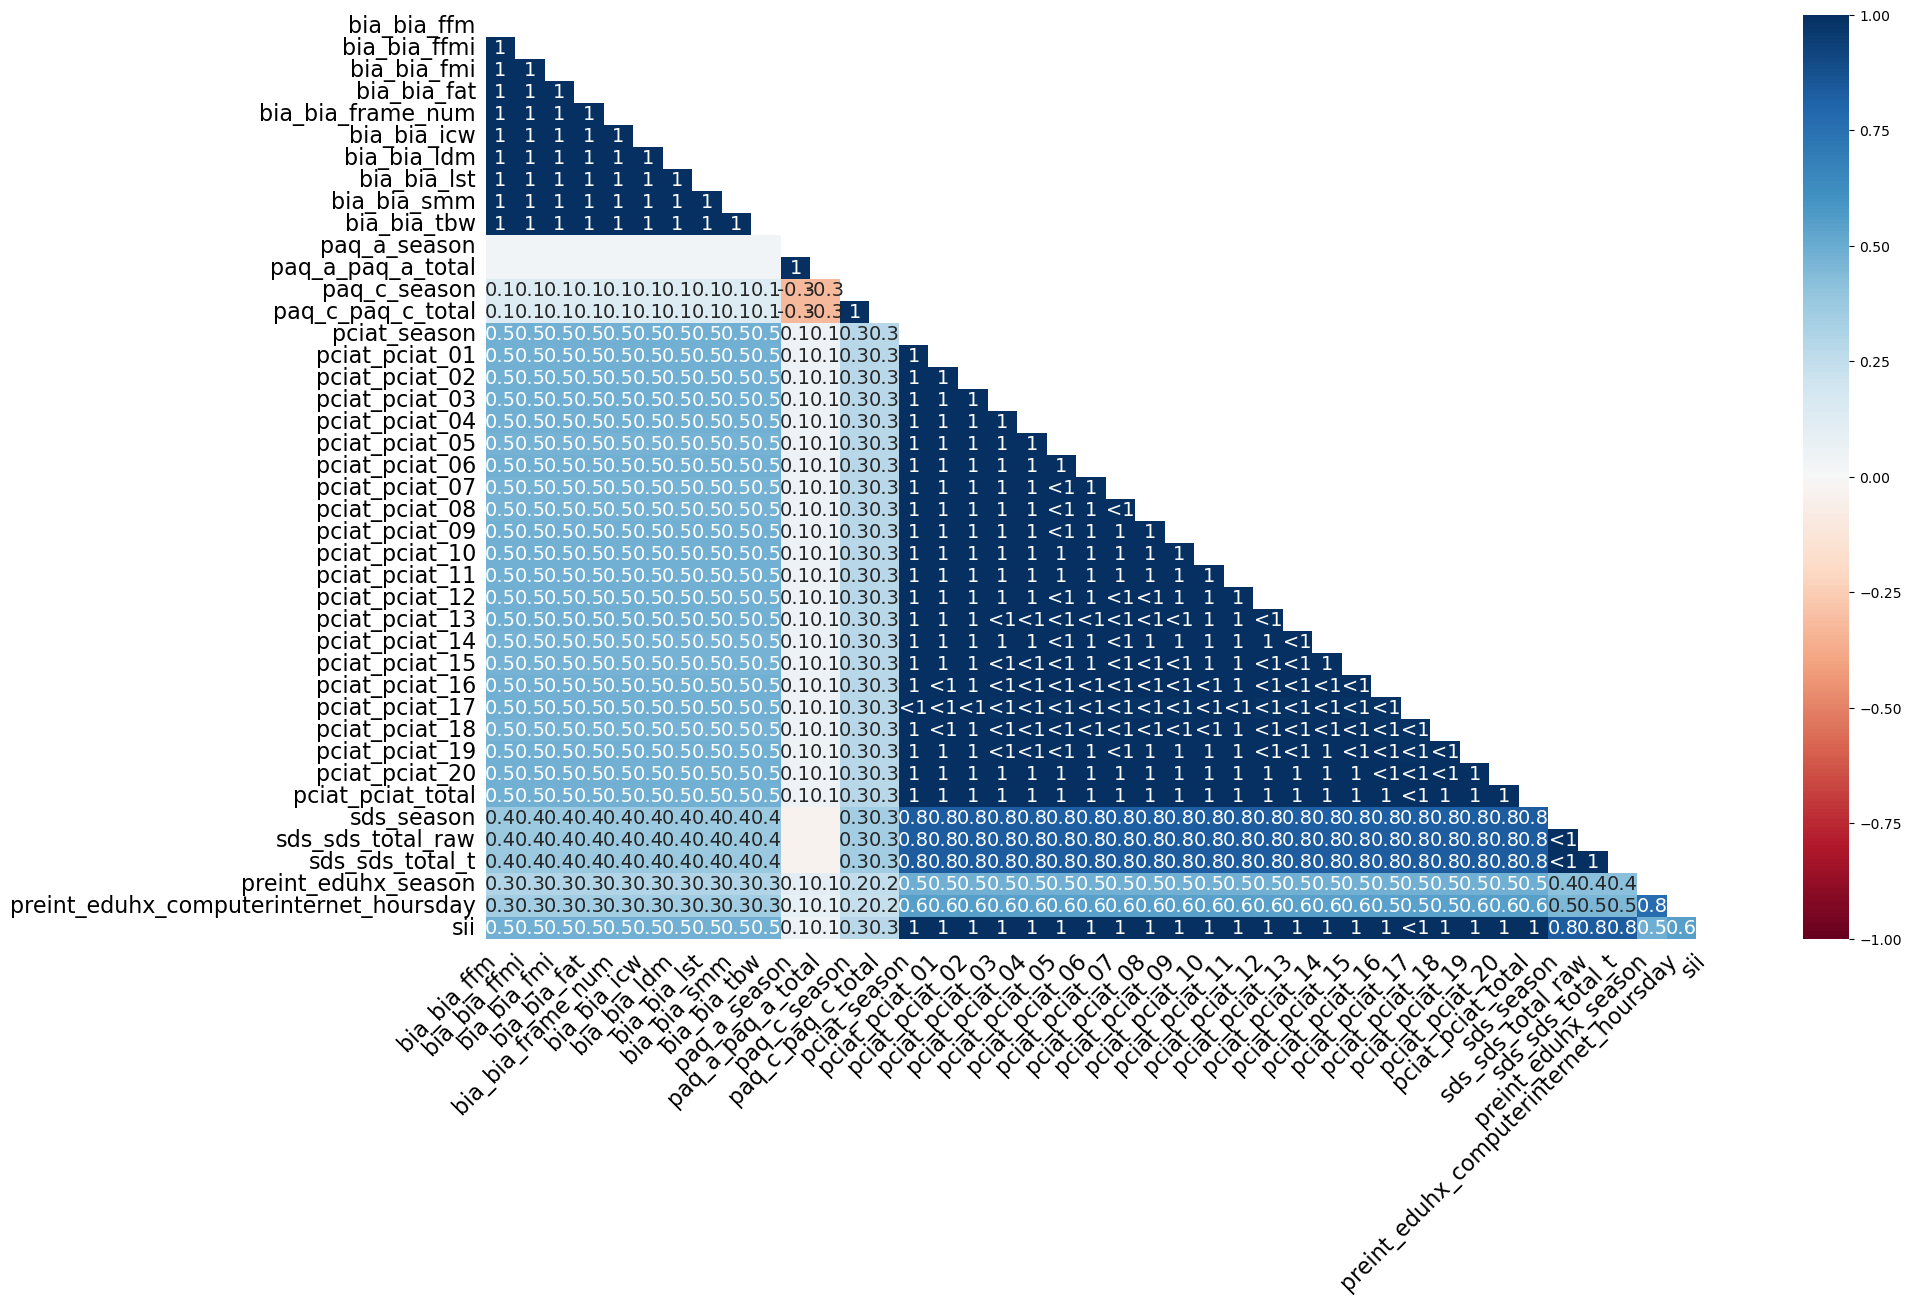

In [9]:
msno.heatmap(train.iloc[:, 40:82])

### 4. Another Histogram using Missingno Bar: 

<Axes: >

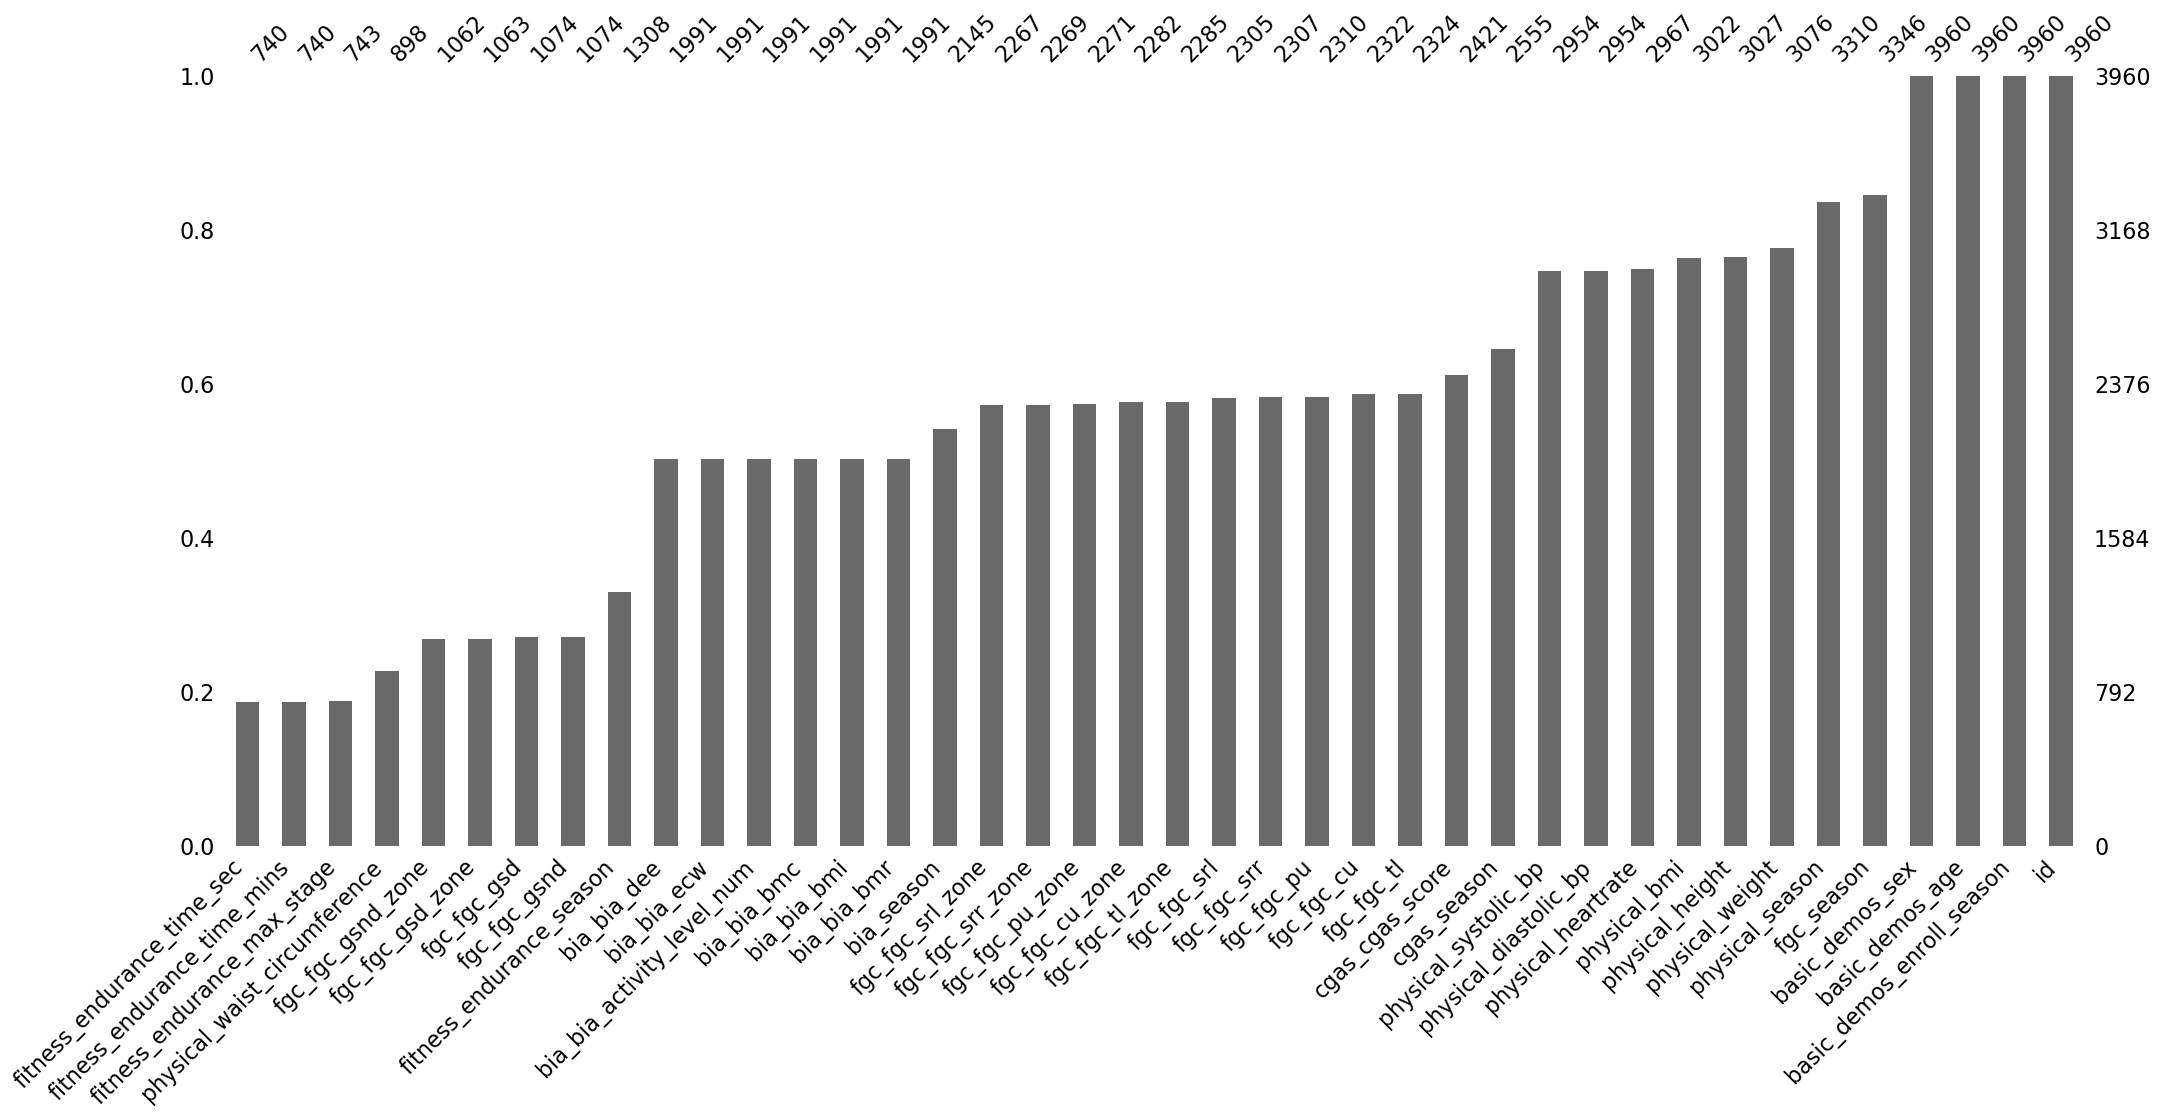

In [10]:
msno.bar(train.iloc[:, :40], sort='ascending') 